# Dataset
https://www.tensorflow.org/api_docs/python/tf/keras/datasets

In [1]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

## MNIST
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

### Loading dataset and Coverting labels to categorical form
https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [2]:
(x_train_1, y_train_1), (x_test_1, y_test_1) = datasets.mnist.load_data()
y_train_1 = to_categorical(y_train_1, num_classes=10)
y_test_1 = to_categorical(y_test_1, num_classes=10)

11490434/11490434 [==============================] - 0s 0us/step


### Train and Test data shapes

In [3]:
print(x_train_1.shape)
print(y_train_1.shape)

(60000, 28, 28)
(60000, 10)


In [4]:
print(x_test_1.shape)
print(y_test_1.shape)

(10000, 28, 28)
(10000, 10)


### Showing one the dataset examples

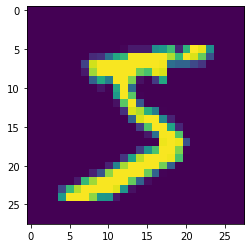

In [5]:
index = 0
fig, (ax1) = plt.subplots(1, 1)
ax1.imshow(x_train_1[index])

## CIFAR-10
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

### Loading dataset and Coverting labels to categorical form
https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [6]:
(x_train_2, y_train_2), (x_test_2, y_test_2) = datasets.cifar10.load_data()
y_train_2 = to_categorical(y_train_2, num_classes=10)
y_test_2 = to_categorical(y_test_2, num_classes=10)

170498071/170498071 [==============================] - 4s 0us/step


### Train and Test data shapes

In [7]:
print(x_train_2.shape)
print(y_train_2.shape)

(50000, 32, 32, 3)
(50000, 10)


In [8]:
print(x_test_2.shape)
print(y_test_2.shape)

(10000, 32, 32, 3)
(10000, 10)


### Showing one the dataset examples

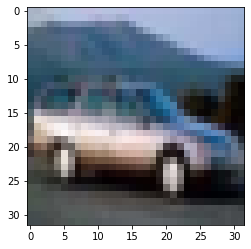

In [9]:
index = 4
fig, (ax1) = plt.subplots(1, 1)
ax1.imshow(x_train_2[index])

## FER-2013
learn more about FER-2013 dataset:
https://www.kaggle.com/datasets/msambare/fer2013

In [5]:
# !wget -N -q "https://drive.google.com/uc?export=download&id=1gwhIXAYyLiZ4Pf4vdiazcyKnJQznJXW-"
# !unzip -n -q archive.zip
train_dir = './train/'
test_dir = './test/'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip -n -q 'drive/MyDrive/archive.zip'

### Image Data Generator
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Create Image Data Generator for Train and Test sets

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.2,
)

test_datagen = ImageDataGenerator(rescale=1./255)

#### Use **.flow_from_directory(directory)** to read Train and Test sets

In [9]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    batch_size=64,
    target_size=(48, 48),
    # shuffle=True,
    color_mode='grayscale',
    class_mode='categorical',
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    batch_size=64,
    target_size=(48, 48),
    # shuffle=True,
    color_mode='grayscale',
    class_mode='categorical',
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
print(len(train_set[0]))
print(test_set)

2


# Model
https://www.tensorflow.org/api_docs/python/tf/keras/models

https://www.tensorflow.org/api_docs/python/tf/keras/layers


In [11]:
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

## Sequential
https://www.tensorflow.org/guide/keras/sequential_model

In [45]:
from tensorflow.keras.models import Sequential

In [46]:
model_temp_1 = Sequential()

# Input Layer
# Write your code here
model_temp_1.add(layers.Input(shape=(50,50)))
model_temp_1.add(layers.Flatten())

# Hidden Layer
# Write your code here
model_temp_1.add(layers.Dense(units=128))
model_temp_1.add(layers.Activation('relu'))

# Output Layer
# Write your code here
model_temp_1.add(layers.Dense(units=5 , activation='softmax'))
model_temp_1.add(layers.Activation('softmax'))

### Model Summary
https://www.tensorflow.org/js/guide/models_and_layers#model_summary

In [47]:
model_temp_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2500)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               320128    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                                 
 activation_1 (Activation)   (None, 5)                 0         
                                                                 
Total params: 320,773
Trainable params: 320,773
Non-trainable params: 0
_________________________________________________________________


### Plotting Model and Save it as **structure_1.png**
https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model 

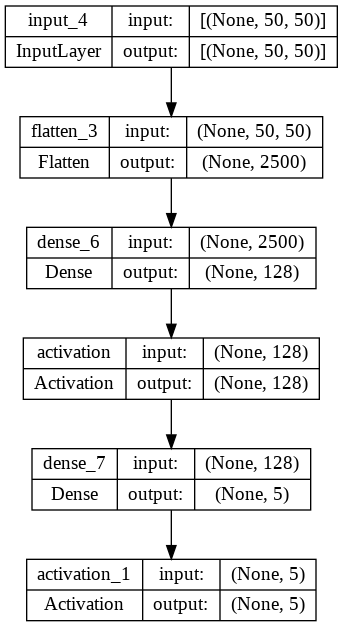

In [48]:
plot_model(
    model_temp_1,
    to_file="structure_1.png",
    show_shapes=True,
    show_layer_names=True,
)

## Functional API 
https://www.tensorflow.org/guide/keras/functional

In [12]:
from tensorflow import keras
from tensorflow.keras.models import Model

In [54]:
def model_factory(input_shape, num_classes):
    # Input Layer
    # Write your code here
    inputs = keras.Input(shape=input_shape)
    flatten = layers.Flatten(data_format=None)(inputs)

    # Hidden Layer
    # Write your code here
    dense = layers.Dense(128)
    dense_relu = layers.Activation('relu')
    x = dense_relu(dense(flatten))

    # Output Layer
    # Write your code here
    dense = layers.Dense(num_classes)
    dense_softmax = layers.Activation('softmax')
    outputs = dense_softmax(dense(x))

    return Model(inputs= inputs, outputs=outputs)

In [55]:
model_template_2 = model_factory(
    input_shape=(50, 50),
    num_classes=5
)

### Model Summary

In [56]:
model_template_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 50, 50)]          0         
                                                                 
 flatten_7 (Flatten)         (None, 2500)              0         
                                                                 
 dense_11 (Dense)            (None, 128)               320128    
                                                                 
 activation_5 (Activation)   (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 5)                 645       
                                                                 
 activation_6 (Activation)   (None, 5)                 0         
                                                                 
Total params: 320,773
Trainable params: 320,773
Non-trainab

### Plotting Model and Save it as **structure_2.png**

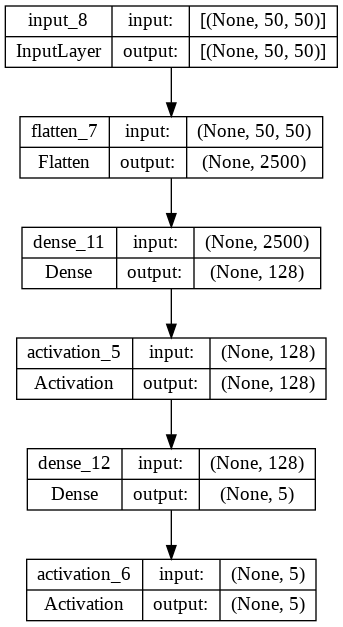

In [57]:
plot_model(
    model_template_2,
    to_file="structure_2.png",
    show_shapes=True,
    show_layer_names=True,
)

## Optimizers and Loss
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [58]:
from tensorflow.keras.optimizers import SGD

In [15]:
# Write your code here
sgd_optimizer = SGD(learning_rate=0.01 ,name="SGD")


## Compile, Fit and Evaluation
https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate

https://keras.io/api/models/model_training_apis/#predict-method

### MNIST

In [16]:
from tensorflow.keras.losses import categorical_crossentropy

In [59]:
from tensorflow.python import metrics
# Write your code here
model_mnist = model_factory(
    (28,28),
    10
)

# Write your code here
model_mnist.compile(
    optimizer = sgd_optimizer, 
    loss = categorical_crossentropy,
    metrics = 'accuracy'
)

# Write your code here
history = model_mnist.fit(
   x_train_1, 
   y_train_1, 
   batch_size = 64, 
   epochs = 5,
   validation_split = 0.2
)

Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 22.8848 - accuracy: 0.3957 - val_loss: 1.3848 - val_accuracy: 0.5532
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 1.5139 - accuracy: 0.4813 - val_loss: 1.3074 - val_accuracy: 0.5626
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 1.2992 - accuracy: 0.5545 - val_loss: 1.1779 - val_accuracy: 0.5866
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 1.3723 - accuracy: 0.5106 - val_loss: 1.4701 - val_accuracy: 0.5140
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 1.3687 - accuracy: 0.5025 - val_loss: 1.3505 - val_accuracy: 0.5341


#### Plotting model Loss and Accuracy on train and validation sets per epoch

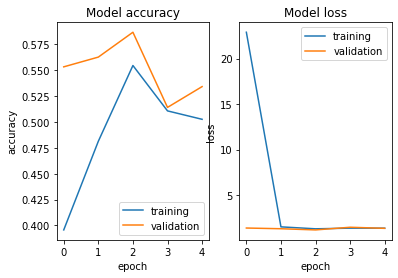

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

#### Evaluating Test set

In [61]:
# Write your code here
model_mnist.evaluate(
    x_test_1,
    y_test_1
)

313/313 [==============================] - 1s 2ms/step - loss: 1.4122 - accuracy: 0.5231


[1.4122111797332764, 0.5231000185012817]

#### Predicting Some samples from Test set

In [85]:
# Write your code here

prediction = model_mnist.predict(
    x = x_test_1
)
print()
for index in range(13,16):

  print('actual:' , np.argmax(prediction[index] , axis=0) )
  print('label:' , np.argmax(y_test_1[index] , axis=0) )
  print("======================================")
  

313/313 [==============================] - 1s 2ms/step

actual: 0
label: 0
actual: 1
label: 1
actual: 3
label: 5


### FER-2013

In [71]:
# Write your code here
model_fer = model_factory(
     (48,48,1),
    7
)

# Write your code here
model_fer.compile(
    optimizer = sgd_optimizer, 
    loss = categorical_crossentropy,
    metrics = 'accuracy'
)

# Write your code here
history = model_fer.fit(
   x = train_set,
   batch_size = 64, 
   epochs = 5,
   validation_data = train_set
)

Epoch 1/5
449/449 [==============================] - 43s 96ms/step - loss: 1.8022 - accuracy: 0.2600 - val_loss: 1.7704 - val_accuracy: 0.2808
Epoch 2/5
449/449 [==============================] - 44s 98ms/step - loss: 1.7574 - accuracy: 0.2925 - val_loss: 1.7727 - val_accuracy: 0.2724
Epoch 3/5
449/449 [==============================] - 42s 93ms/step - loss: 1.7374 - accuracy: 0.3057 - val_loss: 1.7269 - val_accuracy: 0.3122
Epoch 4/5
449/449 [==============================] - 44s 97ms/step - loss: 1.7239 - accuracy: 0.3144 - val_loss: 1.7209 - val_accuracy: 0.3225
Epoch 5/5
449/449 [==============================] - 44s 97ms/step - loss: 1.7152 - accuracy: 0.3191 - val_loss: 1.7234 - val_accuracy: 0.3156


#### Plotting model Loss and Accuracy on train and validation sets per epoch

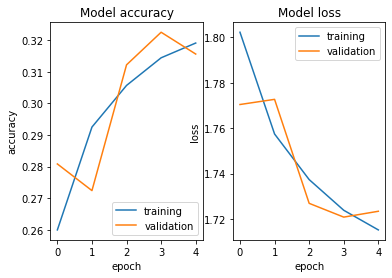

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

#### Evaluating Test set

In [87]:
model_fer.evaluate(
    x=test_set,
)

113/113 [==============================] - 3s 23ms/step - loss: 1.7053 - accuracy: 0.3275


[1.705255389213562, 0.32752856612205505]

#### Predicting Some samples from Test set

113/113 [==============================] - 3s 23ms/step


Text(0.5, 1.0, 'label: happy \n actual: fear')

<Figure size 432x288 with 0 Axes>

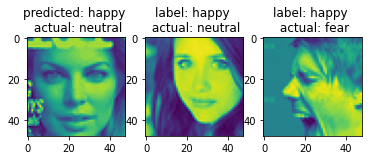

In [88]:
prediction = model_fer.predict(test_set)
# convert prediction to labels
labels = prediction.argmax(axis=-1)

# labels list
label_list = list(test_set.class_indices.keys())

plt.figure()
f, axarr = plt.subplots(1,3) 

# use the created array to output your multiple images.
axarr[0].imshow(np.squeeze(test_set[0][0][5]))
label_1 = label_list[test_set[0][1][5].argmax(axis=-1)]
axarr[1].imshow(np.squeeze(test_set[0][0][29]))
label_2 = label_list[test_set[0][1][29].argmax(axis=-1)]
axarr[2].imshow(np.squeeze(test_set[0][0][10]))
label_3 = label_list[test_set[0][1][10].argmax(axis=-1)]

# Show predicted label for each image
axarr[0].set_title(f'predicted: {label_list[labels[5]]} \n actual: {label_1}')
axarr[1].set_title(f'label: {label_list[labels[29]]} \n actual: {label_2}')
axarr[2].set_title(f'label: {label_list[labels[10]]} \n actual: {label_3}')